In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# no of missiing values in the data set
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# using annual income and spending score form data for clustering 
x=df.iloc[:,[3,4]].values

In [ ]:
print(x)

In [15]:
# choosing the number of clusters with the help of :-
# wcss (within clusters sum of squares)
# using a loop to check which value of cluster provides us with a minimum (wcss) distance of centriod from data points


In [23]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

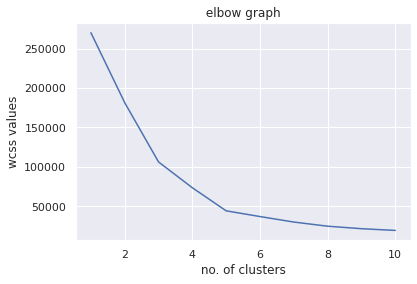

In [24]:
# plotting an elbow graph (to find where we get minimum value of wcss)

sns.set()
plt.plot(range(1,11),wcss)
plt.title(" elbow graph ")
plt.xlabel(" no. of clusters ")
plt.ylabel("wcss values")
plt.show()

In [25]:
# here we can see that around value of 5 we have a minimum value of wcss and it remains same ,thereafter not much change
#conclusion OPTIMUM NUMBER OF CLUSTERS IS 5


In [27]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=10)
#applying a label on the each dataset as to which cluster ,point belongs to:-
y=kmeans.fit_predict(x)
print (y)


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


VISUALIZING CLUSTERS


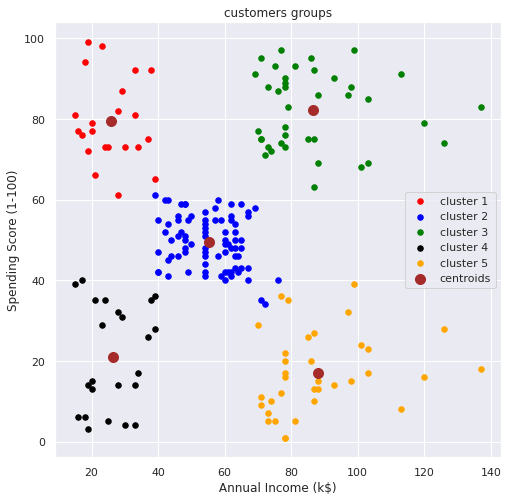

In [44]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=30,c='red',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=30,c='blue',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=30,c='green',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=30,c='black',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=30,c='orange',label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='brown',label="centroids")

plt.title('customers groups')
plt.xlabel(' Annual Income (k$) ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

CONCLUSIONS:-

*   THE CUSTOMERS CAN BE GROUPED INTO 5 DIFFERENT SEGMENTS.

*   PEOPLE BELONGING TO CLUSTER 4 HAVE LESS SPENDING SCORES (CAN GENERATE OFFERS FOR THEM USING MEMBERSHIP CARDS,ETC..)

*   RECOMMENDING PRODUCTS TO PEOPLE FROM CLUSTER 5 BASED ON THEIR HISTORY/INTEREST AS THEY ARE THE ONES THAT SPEND LESS BUT HAVE HIGH EARNINGS (POTENSIAL BUYERS)

*  PEOPLE FROM CLUSTES 1 AND 3 SHOW A VERY HIGH SPENDING SCORE IRRESPECTIVE OF THEIR EARNINGS (THESE GROUPS OF PEOPLE SHOULD BE SHOWN NEW/LATEST PRODUCTS ALONG WITH SOME ROYALTY POINTS FOR BEING A CONSISTENT CUSTOMERS)
















